In [2]:
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Aggregation of Statements and Processing

In [3]:
accs = [f for f in os.listdir('./') if os.path.isdir(os.path.join('./', f))]

for acc in accs:
    if acc == "TD Credit":
        stmts = [stmt for stmt in os.listdir(os.path.join('./', acc))]
        agg_stmt = pd.read_csv(''.join(('./', acc, '/', stmts[0])), error_bad_lines=False)
        if len(stmts) > 1:
            for stmt in stmts[1:]:
                temp = pd.read_csv(''.join(('./', acc, '/', stmt)), error_bad_lines=False)
                temp.columns = agg_stmt.columns
                agg_stmt = agg_stmt.append(temp, ignore_index=True)
        agg_stmt.to_csv(''.join(('./', acc, '.csv')), index=False)
    else:
        stmts = [stmt for stmt in os.listdir(os.path.join('./', acc))]
        agg_stmt = pd.read_csv(''.join(('./', acc, '/', stmts[0])), error_bad_lines=False)
        if len(stmts) > 1:
            for stmt in stmts[1:]:
                temp = pd.read_csv(''.join(('./', acc, '/', stmt)), error_bad_lines=False)
                agg_stmt = pd.concat([agg_stmt, temp])
        agg_stmt.to_csv(''.join(('./', acc, '.csv')), index=False)



c:\Users\Victor\anaconda3\envs\MAIS\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Process credit cards
ct = pd.read_csv('./Canadian Tire.csv')
ct["Account"] = "Canadian Tire Mastercard"
ct["AmountIn"] = np.where(ct["AMOUNT"] >= 0, ct["AMOUNT"], 0)
ct["AmountOut"] = np.where(ct["AMOUNT"] < 0, ct["AMOUNT"]*-1, 0)
ct = ct.rename(columns={"TRANSACTION DATE": "Date", "DESCRIPTION": "Description"})
ct["Date"] = pd.to_datetime(ct['Date'])
ct = ct[["Account", "Date", "Description", "AmountIn", "AmountOut"]]

pc = pd.read_csv('./PC Financial.csv')
pc["Account"] = "PC Financial Mastercard"
pc["AmountIn"] = np.where(pc["Amount"] >= 0, pc["Amount"], 0)
pc["AmountOut"] = np.where(pc["Amount"] < 0, pc["Amount"]*-1, 0)
pc = pc[["Account", "Date", "Description", "AmountIn", "AmountOut"]]

sfv = pd.read_csv('./Simplii Credit.csv')
sfv["Account"] = "Simplii Financial Visa"
sfv = sfv.rename(columns={" Transaction Details": "Description", " Funds Out": "AmountOut", " Funds In": "AmountIn"})
sfv = sfv[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

tdv = pd.read_csv('./TD Credit.csv')
tdv["Account"] = "TD Visa"
tdv = tdv.rename(columns={"Debit": "AmountOut", "Credit": "AmountIn"})
tdv = tdv[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

tgm = pd.read_csv('./Tangerine Credit.csv')
tgm["Account"] = "Tangerine Mastercard"
tgm["AmountIn"] = np.where(tgm["Amount"] >= 0, tgm["Amount"], 0)
tgm["AmountOut"] = np.where(tgm["Amount"] < 0, tgm["Amount"]*-1, 0)
tgm = tgm.rename(columns={"Transaction date": "Date", "Name": "Description"})
tgm = tgm[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

# Process chequing accounts
tgc = pd.read_csv('./Tangerine Chequing.csv')
tgc["Account"] = "Tangerine Chequing"
tgc["AmountIn"] = np.where(tgc["Amount"] >= 0, tgc["Amount"], 0)
tgc["AmountOut"] = np.where(tgc["Amount"] < 0, tgc["Amount"]*-1, 0)
tgc = tgc.rename(columns={"Name": "Description"})
tgc = tgc[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

tdc = pd.read_csv('./TD Chequing.csv')
tdc["Account"] = "TD Chequing"
tdc = tdc[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)


sfc = pd.read_csv('./Simplii Chequing.csv')
sfc["Account"] = "Simplii Chequing"
sfc = sfc.rename(columns={" Transaction Details": "Description", " Funds Out": "AmountOut", " Funds In ": "AmountIn"})
sfc = sfc[["Account", "Date", "Description", "AmountIn", "AmountOut"]].fillna(0)

In [70]:
agg_acc = ct
agg_acc = pd.concat([agg_acc, pc, sfv, tdv, tgm, tgc, tdc, sfc])
agg_acc["Date"] = pd.to_datetime(agg_acc['Date'])


## Binning 
Previously categorized into Investments, Productivity, Material Desires, Health and Vanity, Necessities, Education, Food, Recreation, and Donations
Now
Investments
Groceries
Restaurants
Rent & Utilities
Education
Transfers
Health
Home & Office

In [75]:
agg_acc["Category"] = np.nan
import bin
# Manual Binning

binned_agg = bin.bin(agg_acc)

#This is called each time to help visualize what else is left to be binned.
empty = binned_agg.loc[binned_agg['Category'].isna()]
empty['AmountOut'] = empty['AmountOut'].astype('float')

#empty.nlargest(10, 'AmountOut')

C:\Users\Victor\AppData\Local\Temp/ipykernel_21888/1641053729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty['AmountOut'] = empty['AmountOut'].astype('float')


## Monthy Income and Outcome Analysis

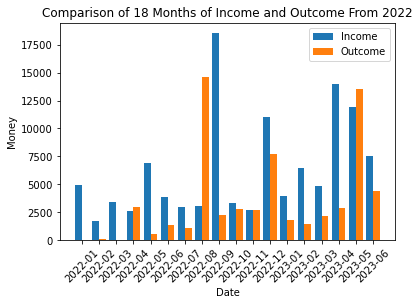

In [44]:
ia = agg_acc.copy(True)

ia['Date'] = ia['Date'].dt.strftime('%Y-%m')
ia = ia[(ia['Category'] != 'Investments') & (ia['Category'] != 'Transfers')][['Date', "AmountIn", "AmountOut"]].groupby('Date').agg('sum')


X = ia.index
income = ia['AmountIn'].to_numpy()
outcome = ia['AmountOut'].to_numpy()
  
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, income, 0.4, label = 'Income')
plt.bar(X_axis + 0.2, outcome, 0.4, label = 'Outcome')
  
plt.xticks(X_axis, X)
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Money")
plt.title("Comparison of 18 Months of Income and Outcome From 2022")
plt.legend()
plt.show()